In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suicides_all = pd.read_csv('who_suicide_statistics.csv')
suicides_all.head(5)

country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

In [3]:
suicides_all.country.unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [4]:
suicides_all.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982])

In [5]:
suicides_all.sex.unique()

array(['female', 'male'], dtype=object)

In [6]:
suicides_all.age.unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [7]:
suicides_all.population.unique()

array([277900., 246800., 267500., ...,   7291.,  12615.,   2496.])

In [20]:
unique_suicides_no = np.array(suicides_all.suicides_no.dropna().unique(), dtype=int)
unique_suicides_no[unique_suicides_no == 0]
#there are 0 values, so Nan does not correspond to zero

array([0])

In [24]:
nans_percentage = len(suicides_all[suicides_all.suicides_no.isnull()]) / len(suicides_all) * 100
print('Nan percentage is {:.2f}%'.format(nans_percentage))

Nan percentage is 5.15%


In [26]:
#check in which year nans occur
nan_rows = suicides_all[suicides_all.suicides_no.isnull()]
nan_rows.year.unique()

array([1985, 1986, 1990, 1991, 2011, 2012, 2013, 2014, 2015, 1983, 2004,
       2005, 1979, 2006, 1981, 1982, 2010, 1995, 1980, 1984, 1987, 1988,
       1989, 2002, 2003, 1992, 1993, 2008, 2016, 1994, 1996, 1997, 1998])

In [28]:
suicides_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124f57fd0>,
      dtype=object)

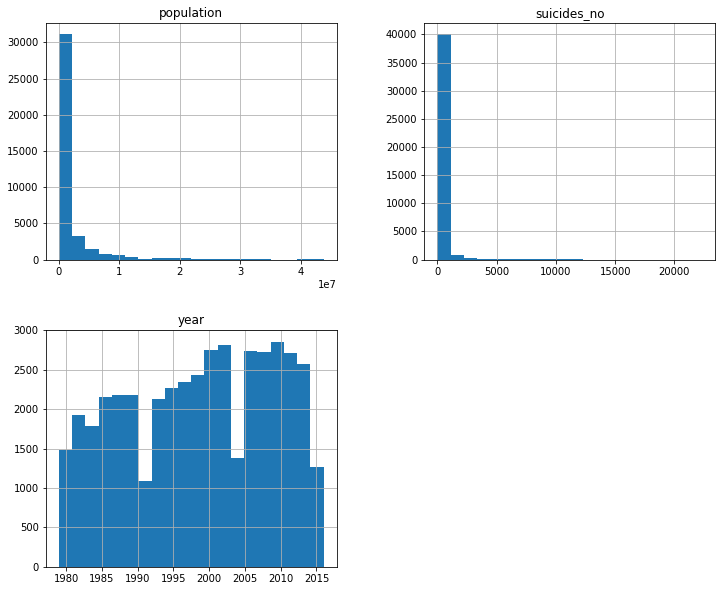

In [31]:
suicides_all.hist(bins=20, figsize=(12,10))

In [32]:
countries = suicides_all.country.unique()
ages = suicides_all.age.unique()

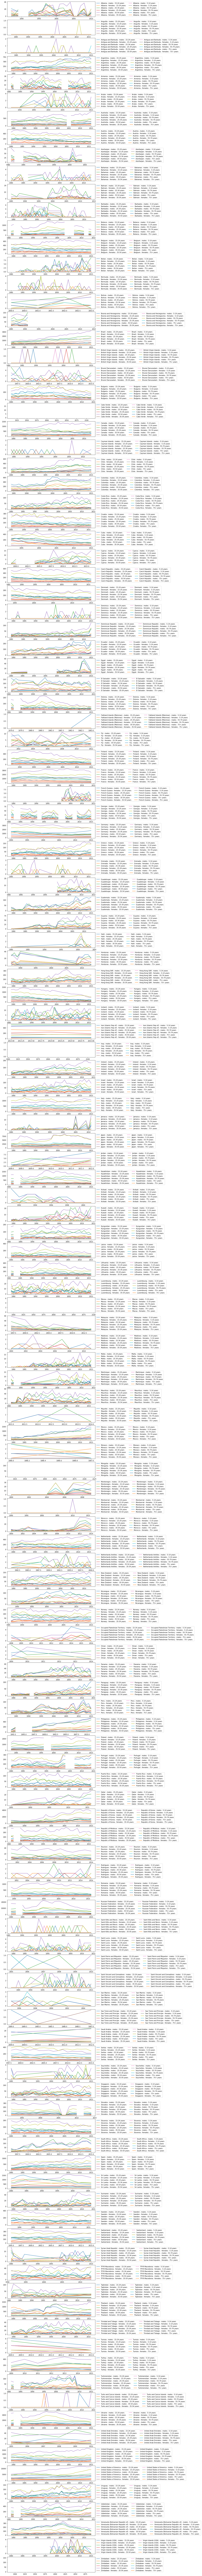

In [50]:
plt.figure(figsize=(10, 300))
for i, country in enumerate(countries):
    ax = plt.subplot(len(countries), 1, i+1)
    for j, age in enumerate(ages):
        #try:
        by_age = suicides_all[(suicides_all.country == country) & (suicides_all.age == age)]
        by_age = by_age.sort_values(by='year')
        male = by_age[by_age.sex == 'male']
        years_male = male.year
        female = by_age[by_age.sex == 'female']
        years_female = female.year
        plt.plot(years_male, male.suicides_no, label=country+' - males - '+age)
        plt.plot(years_female, female.suicides_no, label=country+' - females - '+age)
        #except:
        #    pass
    ax.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))